## IMPLEMENTAZIONE DCT

In [52]:
def dct2_personal(a):
    n = len(a)  # rows
    m = len(a[0])  # columns
    c = np.zeros((n, m))  # result matrix
    # dct by rows
    for i in range(n):
        c[i] = dct_personal(a[i])  # i-th row
    # dct by columns
    for j in range(m):
        c[:, j] = dct_personal(c[:, j])

    return c

def dct_personal(v):
    n = len(v)
    c = np.zeros(n)
    for k in range(n):
        if k == 0:
            alpha = n
        else:
            alpha = n / 2
        sum = 0
        for i in range(n):
            sum = sum + v[i] * math.cos(k * math.pi * ((2 * i + 1) / (2 * n)))
        c[k] = (1 / math.sqrt(alpha)) * sum

    return c

In [53]:
def my_dct_personal(v):
    n = len(v)
    c = np.zeros(n)
    for k in range(n):
        alpha = 0 if k==0 else n/2
        c_list = map(lambda i: math.cos(k * math.pi * ((2 * i + 1) / (2 * n))), v)
        c[k] = (1 / math.sqrt(alpha)) * sum(c_list)
    return c

## CALCOLI

In [54]:
import numpy as np
from scipy.fft import dct
import time
import math

lib_times = []
my_times = []
dims = []

for i in range(4,13):
    N = 2**i
    dims.append(N)
    a = np.random.rand(N,N)

    lib_ti = time.time()
    lib_dct = dct(dct(a, axis=1, norm="ortho"), axis=0, norm="ortho")
    lib_tf = time.time()
    lib_times.append(lib_tf - lib_ti)

    my_ti = time.time()
    my_dct = dct2_personal(a)
    my_tf = time.time()
    my_times.append(my_tf - my_ti)

## PLOT

[None]

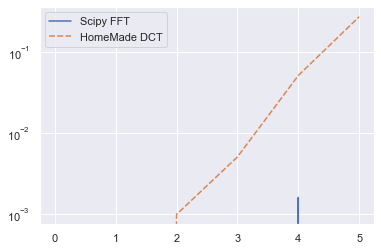

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

sns.set_theme(style="darkgrid")

data = pd.DataFrame(list(zip(lib_times, my_times)), columns=['Scipy FFT','HomeMade DCT'])
data.to_pickle(os.path.join(".", "out-dct", "data-dct.pkl"))

g = sns.lineplot(data=data)
g.set(yscale='log')

## CASO DI TEST

In [56]:
'''
import math
import numpy as np
from numpy import random
from scipy.fft import dct
import time

# TEST CASE
a = np.array([[231, 32, 233, 161, 24, 71, 140, 245],
              [247, 40, 248, 245, 124, 204, 36, 107],
              [234, 202, 245, 167, 9, 217, 239, 173],
              [193, 190, 100, 167, 43, 180, 8, 70],
              [11, 24, 210, 177, 81, 243, 8, 112],
              [97, 195, 203, 47, 125, 114, 165, 181],
              [193, 70, 174, 167, 41, 30, 127, 245],
              [87, 149, 57, 192, 65, 129, 178, 228]])

lib_ti = time.time()
lib_dct = dct(dct(a, axis=1, norm="ortho"), axis=0, norm="ortho")
lib_tf = time.time()
lib_t_diff = lib_tf - lib_ti

my_ti = time.time()
my_dct = dct2_personal(a)
my_tf = time.time()
my_t_diff = my_tf - my_ti
'''

'\nimport math\nimport numpy as np\nfrom numpy import random\nfrom scipy.fft import dct\nimport time\n\n# TEST CASE\na = np.array([[231, 32, 233, 161, 24, 71, 140, 245],\n              [247, 40, 248, 245, 124, 204, 36, 107],\n              [234, 202, 245, 167, 9, 217, 239, 173],\n              [193, 190, 100, 167, 43, 180, 8, 70],\n              [11, 24, 210, 177, 81, 243, 8, 112],\n              [97, 195, 203, 47, 125, 114, 165, 181],\n              [193, 70, 174, 167, 41, 30, 127, 245],\n              [87, 149, 57, 192, 65, 129, 178, 228]])\n\nlib_ti = time.time()\nlib_dct = dct(dct(a, axis=1, norm="ortho"), axis=0, norm="ortho")\nlib_tf = time.time()\nlib_t_diff = lib_tf - lib_ti\n\nmy_ti = time.time()\nmy_dct = dct2_personal(a)\nmy_tf = time.time()\nmy_t_diff = my_tf - my_ti\n'